<a href="https://colab.research.google.com/github/ikukang/MLwithPython/blob/master/5_1_Introduction_to_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)          # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)       # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

# Warning Message hide
import warnings
warnings.filterwarnings('ignore')

In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras import layers
from keras import models

# 선형으로 쌓는 Sequential 모델을 이용
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 입력 parameter는 28*28*1 의 MNIST 손글씨 숫자 행렬이고, Channel이 32인 3*3 필터를 통해  CNN 연산을 수행
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (28 + 2*0 - 3) / 1 + 1 = 26 이 됨 (즉, Output Height = 26)
#  OW = (W + 2P - FW) / S + 1 = (28 + 2*0 - 3) / 1 + 1 = 26 이 됨 (즉, Output Width = 26)
# Channel = 32 이므로, Output Shape은 (26, 26, 32)
#  그러므로 paramter갯수는 1 * (3*3*32) + 32 = 320

model.add(layers.MaxPooling2D((2, 2)))
# 2*2 필터를 이용하여 MaxPooling 수행 (학습해야 할 Parameter가 없고, 채널 수가 변하지 않음)
# 2*2 필터를 사용했으므로, OH, OW는 1/2로 축소 됨

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 입력 parameter는 13*13*32 이고, Channel이 64인 3*3 필터를 통해  CNN 연산을 수행 (MaxPooling으로 OH, OW 축소)
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (13 + 2*0 - 3) / 1 + 1 = 11 이 됨 (즉, Output Height = 11)
#  OW = (W + 2P - FW) / S + 1 = (13 + 2*0 - 3) / 1 + 1 = 11 이 됨 (즉, Output Width = 11)
# Channel = 64 이므로, Output Shape은 (11, 11, 64)
#  그러므로 paramter갯수는 32 * (3*3*64) + 64 = 18496

model.add(layers.MaxPooling2D((2, 2)))
# 2*2 필터를 이용하여 MaxPooling 수행 (학습해야 할 Parameter가 없고, 채널 수가 변하지 않음)
# 2*2 필터를 사용했으므로, OH, OW는 1/2로 축소 됨

model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
# 입력 parameter는 5*5*64 이고, Channel이 64인 3*3 필터를 통해  CNN 연산을 수행 (MaxPooling으로 OH, OW 축소)
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (5 + 2*0 - 3) / 1 + 1 = 3 이 됨 (즉, Output Height = 3)
#  OW = (W + 2P - FW) / S + 1 = (5 + 2*0 - 3) / 1 + 1 = 3 이 됨 (즉, Output Width = 3)
# Channel = 64 이므로, Output Shape은 (3, 3, 64)
#  그러므로 paramter갯수는 64 * (3*3*64) + 64 = 36928

In [0]:

model.add(layers.Flatten())
# Fully Connected Network(Dense Network, 완전연결층)에 주입하기 위해 Flatten 작업
# 출력층(3*3*64)  -> 576 으로 Flatten 하고, parameter 갯수는 변경 없음

model.add(layers.Dense(64, activation='relu'))
# Fully Connected Network에 주입
# Dense Network 이므로, Parameter의 갯수는 576 * 64 + 64 = 36928

model.add(layers.Dense(10, activation='softmax'))
# 확률 계산을 위해 활성화 함수는 'softmax'를 이용, Fully Connected Network에 주입
# Dense Network 이므로, Parameter의 갯수는 64 * 10 + 10 = 650

# 총 Parameter의 갯수
# : 320 + 18,496 + 36,928 + 36,928 + 650 = 93,322

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_label), (test_images, test_label) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

print(train_images.shape)
print(train_label.shape)
print(test_images.shape)
print(test_label.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [0]:
val_images = train_images[:10000]
partial_train_images = train_images[10000:]
val_label = train_label[:10000]
partial_train_label = train_label[10000:]

print(val_images.shape)
print(partial_train_images.shape)
print(val_label.shape)
print(partial_train_label.shape)

(10000, 28, 28, 1)
(50000, 28, 28, 1)
(10000,)
(50000,)


In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(partial_train_images, partial_train_label, batch_size=512, epochs=10, 
                    validation_data=(val_images, val_label))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 31us/step - loss: 0.5885 - acc: 0.8131 - val_loss: 0.2055 - val_acc: 0.9395
Epoch 2/10
50000/50000 [==============================] - 1s 24us/step - loss: 0.1396 - acc: 0.9578 - val_loss: 0.0990 - val_acc: 0.9724
Epoch 3/10
50000/50000 [==============================] - 1s 24us/step - loss: 0.0816 - acc: 0.9749 - val_loss: 0.0732 - val_acc: 0.9778
Epoch 4/10
50000/50000 [==============================] - 1s 24us/step - loss: 0.0570 - acc: 0.9818 - val_loss: 0.1005 - val_acc: 0.9687
Epoch 5/10
50000/50000 [==============================] - 1s 24us/step - loss: 0.0455 - acc: 0.9856 - val_loss: 0.0503 - val_acc: 0.9848
Epoch 6/10
50000/50000 [==============================] - 1s 24us/step - loss: 0.0366 - acc: 0.9884 - val_loss: 0.0540 - val_acc: 0.9844
Epoch 7/10
50000/50000 [==============================] - 1s 24us/step - loss: 0.0302 - acc: 0.9905 - val_loss: 0.0406 - val_acc

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

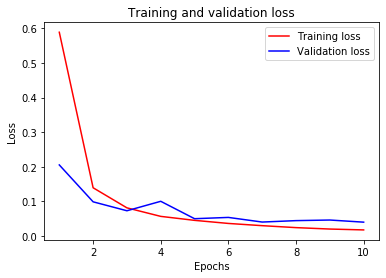

In [0]:
# Training & Validation Loss Graph
import matplotlib.pyplot as plt

plt.clf()   # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

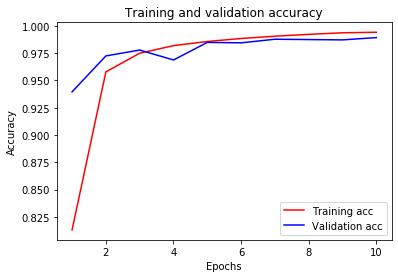

In [0]:
# Training & Validation Accuracy Graph
plt.clf()   # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model.save('mnist_cnn.h5') 

In [0]:
test_loss, test_accuracy = model.evaluate(test_images, test_label)

10000/10000 [==============================] - 1s 55us/step


In [0]:
test_accuracy
print('\n')
test_loss

0.9905

0.027961876029921406